In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("FlightDelays.csv")
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime


In [4]:
delay = df[df['Flight Status'] == 'delayed']
delay.head()


,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
53,1455,DH,1531,LGA,229,01-02-2004,7211,IAD,0,5,2,N665BR,delayed
56,1039,DH,1236,LGA,229,01-02-2004,7792,IAD,0,5,2,N665BR,delayed
62,2120,DH,2305,JFK,228,01-02-2004,7814,IAD,0,5,2,N657BR,delayed
96,1245,DH,1350,EWR,213,01-02-2004,7303,IAD,0,5,2,N686BR,delayed
97,1430,DH,1512,EWR,213,01-02-2004,7307,IAD,0,5,2,N309UE,delayed


In [5]:
delay['difference'] = delay['DEP_TIME'] - delay['CRS_DEP_TIME']
print(delay.head())

    CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM ORIGIN  \
53          1455      DH      1531  LGA       229  01-02-2004    7211    IAD   
56          1039      DH      1236  LGA       229  01-02-2004    7792    IAD   
62          2120      DH      2305  JFK       228  01-02-2004    7814    IAD   
96          1245      DH      1350  EWR       213  01-02-2004    7303    IAD   
97          1430      DH      1512  EWR       213  01-02-2004    7307    IAD   

    Weather  DAY_WEEK  DAY_OF_MONTH TAIL_NUM Flight Status  difference  
53        0         5             2   N665BR       delayed          76  
56        0         5             2   N665BR       delayed         197  
62        0         5             2   N657BR       delayed         185  
96        0         5             2   N686BR       delayed         105  
97        0         5             2   N309UE       delayed          82  


C:\Users\HP\AppData\Local\Temp\ipykernel_28896\3629492534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay['difference'] = delay['DEP_TIME'] - delay['CRS_DEP_TIME']


In [6]:
delays = delay[(delay['difference'] >= 0) & (delay['difference'] <= 10)]
percentage = (len(delays) / len(delay)) * 100
print("Percentage of delayed flights between 0 and 10 minutes: ",percentage)

Percentage of delayed flights between 0 and 10 minutes:  11.448598130841122


In [7]:
df['difference'] = df['DEP_TIME'] - df['CRS_DEP_TIME']

In [8]:
sample = df.sample(n=1000)
sample['difference'] = sample['DEP_TIME'] - sample['CRS_DEP_TIME']

In [9]:
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,difference
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime,0
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime,0
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime,0
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime,-6
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime,-4


In [10]:
sample_delay = sample[sample['Flight Status'] == 'delayed']
sample_delay.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,difference
213,1630,CO,1833,EWR,199,01-04-2004,810,DCA,0,7,4,N16649,delayed,203
1811,1715,DH,1829,JFK,228,1/26/2004,7812,IAD,0,1,26,N333UE,delayed,114
290,1245,DH,1357,EWR,213,01-05-2004,7303,IAD,0,1,5,N664BR,delayed,112
1026,730,DL,729,LGA,214,1/15/2004,1742,DCA,0,4,15,N221DL,delayed,-1
1857,1500,RU,1500,EWR,213,1/26/2004,2156,IAD,0,1,26,N14116,delayed,0


In [15]:
def sample_median(df, sample_size=1000):
    sample = delay['difference'].sample(n=sample_size, replace=True)
    return sample.median()

num_simulations = 5000
medians = []

for _ in range(num_simulations):
    median_value = sample_median(df, sample_size=1000)
    medians.append(median_value)

medians_array = np.array(medians)

print(medians_array[:10])

print(f"Mean of simulated medians: {np.mean(medians_array):.2f}")
print(f"Standard deviation of simulated medians: {np.std(medians_array):.2f}")

[45.  50.  54.  46.  39.  45.  45.  48.5 50.  41. ]
Mean of simulated medians: 43.58
Standard deviation of simulated medians: 3.88


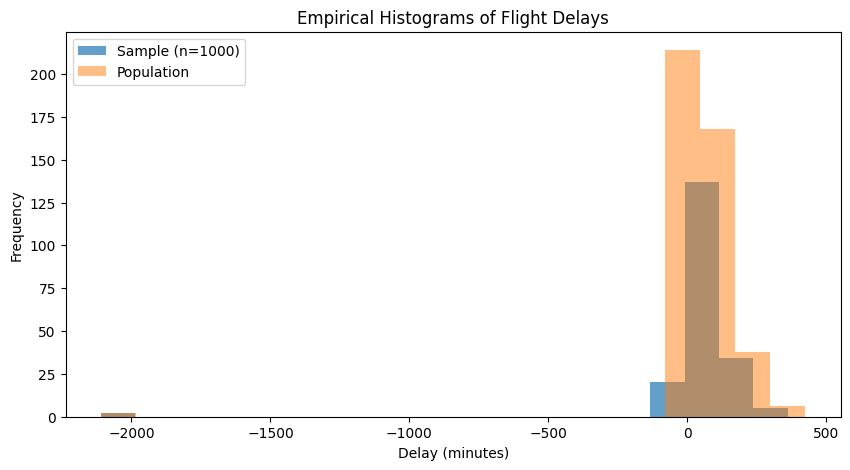

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(sample_delay['difference'], bins=20, alpha=0.7, label='Sample (n=1000)')
plt.hist(delay['difference'], bins=20, alpha=0.5, label='Population')
plt.title('Empirical Histograms of Flight Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [14]:
delay['difference'].median()

43.0